In [4]:
import os
import glob
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

from scipy.ndimage import zoom

In [6]:
name_dataset = "2d_enhanced_sk8R_2x_512"
resize_f = 2
# test_folder = "testB"

# list_ori = glob.glob("./data/"+name_dataset+"/test/*.nii")
list_ori = glob.glob("./data/pet_test/test/*.nii")
list_ori.sort()
for path_ori in list_ori:
    print(path_ori)
    nii_name = os.path.basename(path_ori)[:-4]
    nii_file = nib.load(path_ori)
    nii_data = np.asanyarray(nii_file.dataobj)
    
    
#     pred_real = np.zeros((nii_data.shape[0], nii_data.shape[1], nii_data.shape[2]))
    pred_fake = np.zeros((nii_data.shape[0], nii_data.shape[1], nii_data.shape[2]))
    
    for idx in range(nii_data.shape[2]):
#         path_real = "./pytorch-CycleGAN-and-pix2pix/results/"+name_dataset+"/test_latest/images/"+nii_name+"_"+str(idx)+"_real.npy"
#         img = cv2.resize(np.asarray(plt.imread(path_real)), dsize=(nii_data.shape[0], nii_data.shape[1]), interpolation=cv2.INTER_CUBIC)
#         img = np.load(path_real)
#         pred_real[:, :, idx] = img[1, :, :]

        path_fake = "./pytorch-CycleGAN-and-pix2pix/results/"+name_dataset+"/test_latest/images/"+nii_name+"_"+str(idx)+"_fake.npy"
#         img = cv2.resize(np.asarray(plt.imread(path_fake)), dsize=(nii_data.shape[0], nii_data.shape[1]), interpolation=cv2.INTER_CUBIC)
        img = np.squeeze(np.load(path_fake))
        img[img<0] = 0
        pred_fake[:, :, idx] = zoom(img[1, :, :], zoom=1/resize_f)
    
#     factor_r = np.sum(nii_data)/np.sum(pred_real)
    factor_f = np.sum(nii_data)/np.sum(pred_fake)
    
    # remove pattern
#     for idx in range(nii_data.shape[2]):
#         pred_fake[:, :, idx] = pred_fake[:, :, idx] - pred_fake[:, :, -1]
    
# #     print(path_ori.replace("pet", "water"))
# #     nii_file = nib.load(path_ori.replace("pet", "water"))
    
#     file_real = nib.Nifti1Image(pred_real*factor_r, nii_file.affine, nii_file.header)
#     nib.save(file_real, "./"+nii_name+"_"+name_dataset+"_real.nii")
    file_fake = nib.Nifti1Image(pred_fake*factor_f, nii_file.affine, nii_file.header)
    nib.save(file_fake, "./"+nii_name+"_"+name_dataset+"_fake.nii")
print("------------------------------------------------------------")
print("----------------------Finished------------------------------")
print("------------------------------------------------------------")

./data/pet_test/test/subj01_pet.nii
------------------------------------------------------------
----------------------Finished------------------------------
------------------------------------------------------------


In [4]:
import os
import glob
import cv2
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

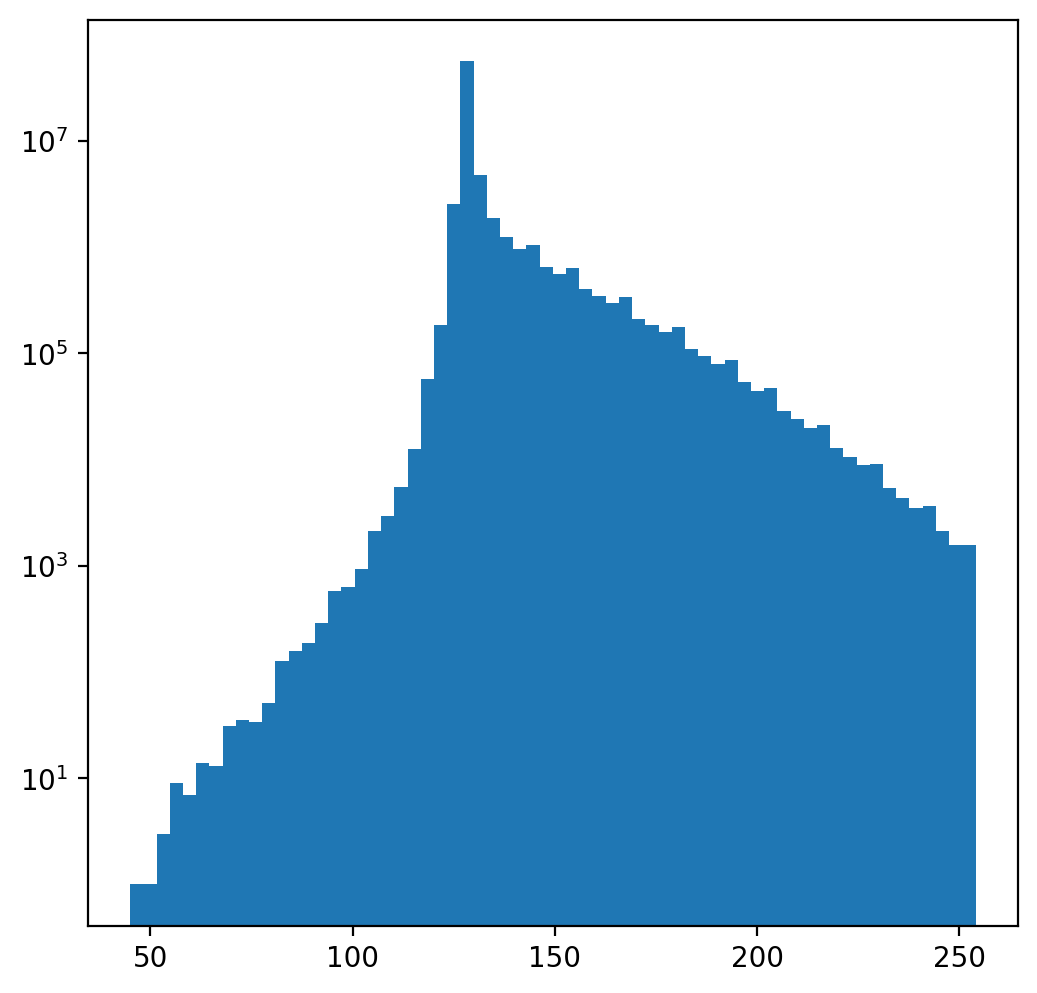

In [8]:
plt.figure(figsize=(6,6), dpi=200)

plt.hist(np.ravel(pred_fake), bins=64)
plt.yscale('log', nonposy='clip')